## INPUT FORMAT
- N: the width of the map
- M: the height of the map
- C: the number of Customer Headquarters
- R: representing the maximum number of Reply Offices that can be built

C lines follow, each one built of three integers describing the X coordinate, the Y coordinate, and the reward associated with Customer Headquarter.

Then, M lines follow, describing a row of N terrain cells. The top-left cell is the origin of the map and is thus assigned “(0, 0)” coordinates. In the world map columns are represented by the X coordinate, while rows by the Y coordinate.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_index = 1

files = [
    "0_example.txt",
    "1_victoria_lake.txt",
    "2_himalayas.txt",
    "3_budapest.txt",
    "4_manhattan.txt",
    "5_oceania.txt",
]

file = "data/" + files[file_index]

In [3]:
# type of terrain

terrain = {
    "#": math.inf, # Mountains
    "~": 800,      # Water
    "*": 200,      # Traffic jam
    "+": 150,      # Dirt
    "X": 120,      # Railway level crossing
    "_": 100,      # Standard terrain
    "H":  70,      # Highway
    "T":  50       # Railway
}

In [4]:
# open file

f = open(file, 'r') 

N, M, C, R = [int(x) for x in next(f).split()]

customers = np.empty(C, dict)

for i in range(C):
    n, m, reward = [int(x) for x in next(f).split()]
    customers[i] = {
        "m": m,
        "n": n,
        "reward": reward
    }
    
mapp = np.empty((M, N))

for m in range(M):
    mapp[m] = [terrain[mn] for mn in next(f)[:N]]
    
print(N, M, C, R)

50 50 20 8


In [5]:
customers

array([{'m': 19, 'n': 10, 'reward': 81}, {'m': 2, 'n': 12, 'reward': 44},
       {'m': 24, 'n': 29, 'reward': 185},
       {'m': 8, 'n': 41, 'reward': 136},
       {'m': 28, 'n': 37, 'reward': 308},
       {'m': 8, 'n': 31, 'reward': 488}, {'m': 3, 'n': 5, 'reward': 265},
       {'m': 15, 'n': 20, 'reward': 256},
       {'m': 14, 'n': 31, 'reward': 127},
       {'m': 16, 'n': 8, 'reward': 104},
       {'m': 12, 'n': 12, 'reward': 223},
       {'m': 21, 'n': 27, 'reward': 271},
       {'m': 32, 'n': 49, 'reward': 147},
       {'m': 21, 'n': 30, 'reward': 134},
       {'m': 31, 'n': 40, 'reward': 312},
       {'m': 4, 'n': 30, 'reward': 327},
       {'m': 30, 'n': 47, 'reward': 418},
       {'m': 25, 'n': 21, 'reward': 355}, {'m': 2, 'n': 6, 'reward': 477},
       {'m': 2, 'n': 5, 'reward': 378}], dtype=object)

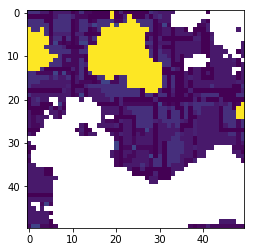

In [6]:
plt.imshow(mapp);

In [12]:
import queue

def visit(mapp, customer):
    customer_m = customer["m"]
    customer_n = customer["n"]
    reward = customer["reward"]
    
    customer_mapp = np.empty((M, N))
    customer_mapp.fill(- math.inf)
    
    customer_path = np.empty((M, N), str)
    customer_path.fill(" ")
    
    q = queue.Queue()
    q.put((customer_m + 1, customer_n, reward, "U"))
    q.put((customer_m - 1, customer_n, reward, "D"))
    q.put((customer_m, customer_n + 1, reward, "L"))
    q.put((customer_m, customer_n - 1, reward, "R"))
    
    while not q.empty():
        m, n, reward, path = q.get()
        
        if m >= 0 and m < M and \
            n >= 0 and n < N and \
            not (n == customer_n and m == customer_m):
            
            reward = reward - mapp[m][n]
            if reward > customer_mapp[m][n]:
                customer_mapp[m][n] = reward
                customer_path[m][n] = path
                q.put((m + 1, n, reward, "U"))
                q.put((m - 1, n, reward, "D"))
                q.put((m, n + 1, reward, "L"))
                q.put((m, n - 1, reward, "R"))
    
    return customer_mapp, customer_path
            
    

In [13]:
reward, path = visit(mapp, customers[0])

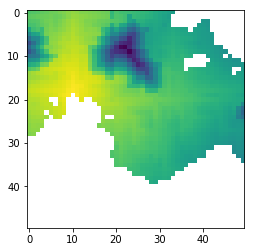

In [14]:
plt.imshow(reward)

print(path)
print(reward)

In [15]:
def get_path(path, m, n):
    path_string = ""
    while(path[m][n] != "X" and path[m][n] != " "):
        path_string += path[m][n]
        if path[m][n] == "U":
            m -= 1
        elif path[m][n] == "D":
            m += 1
        elif path[m][n] == "L":
            n -= 1
        elif path[m][n] == "R":
            n += 1
        else:
            return ""
    return path_string

In [16]:
from numpy import unravel_index


rewards = np.zeros((M, N))

for customer in customers:
    c_reward, c_path = visit(mapp, customer)
    customer["reward_mapp"] = c_reward
    customer["path_mapp"] = c_path
    rewards += c_reward

In [18]:
solution = open("solution/" + files[file_index], "w")

h_m, h_n = unravel_index(rewards.argmax(), rewards.shape)

print("HQ", h_m, h_n, rewards[h_m][h_n])
for customer in customers:
    if customer["reward_mapp"][h_m][h_n] >= 0:
        solution.write("{} {} {}\n".format(h_n, h_m, get_path(customer["path_mapp"], h_m, h_n)))

        print(h_m, h_n, get_path(customer["path_mapp"], h_m, h_n), customer["reward_mapp"][h_m][h_n])

mapp[h_m][h_n] = math.inf

solution.close()

HQ 20 27 -24394.0
20 27 D 221.0


In [268]:
print(mapp)
print(rewards)
x, y = unravel_index(rewards.argmax(), rewards.shape)

mapp[x][y], rewards[x][y]

[[ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf
   inf  inf  inf  inf  inf  inf]
 [ inf  inf 100. 100. 100. 100. 100.  50. 100. 100. 100. 100.  inf  inf
  100. 100. 100.  inf  inf  inf]
 [ inf  inf  inf  inf 100. 100. 100. 120. 100.  inf 100. 100. 100. 100.
  100. 100. 100.  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf 100.  50. 100.  inf  inf 100. 100. 100.
  100. 100. 100.  inf  inf  inf]
 [ inf 100. 100. 100.  50. 120.  50.  50. 800. 800.  inf  inf 100. 100.
  150. 150. 100. 100.  inf  inf]
 [ inf 100. 100. 100.  50. 100.  inf 800. 800. 800. 800.  inf  inf 150.
  150. 150. 150. 150. 100.  inf]
 [100. 100. 100. 100.  50. 100.  inf 800. 800. 800. 800. 800.  inf 150.
  150. 150. 150. 100. 100. 100.]
 [ inf 100. 100. 100. 100. 100. 100. 800. 800. 800. 800.  inf  inf 150.
  150. 150. 100. 100. 100.  inf]
 [ inf 100. 100. 100. 100. 100. 100. 100. 800. 800.  inf 100. 100. 100.
  100. 100. 100.  inf 100.  inf]
 [100. 100. 100.  70.  70.  70.  70. 200.  70.  70. 200

(inf, 3800.0)

In [234]:
get_path(path, 9,14)

'RUUUUUUUU'

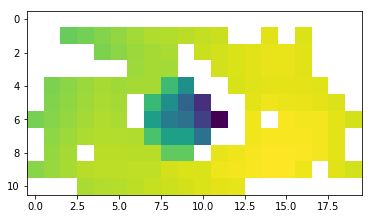

In [235]:
rewards = np.zeros((M, N))
paths = []
for customer in customers:
    cost, path = visit(mapp, customer)
    rewards += cost
    paths.append(path)

plt.imshow(rewards)

In [236]:
from numpy import unravel_index
unravel_index(rewards.argmax(), rewards.shape)

(9, 14)

In [ ]:
import queue

for customer in customers:
    customer_mapp = np.empty((M, N))
    customer_mapp.fill(- math.inf)
    customer_mapp[customer["m"]][customer["n"]]
    
    q = queue.Queue()
    q.put((m, n, reward))
    
    while not q.empty():
        m, n, reward = q.get()
        
    

In [ ]:
import queue

q = queue.Queue()

for i in range(5):
    q.put(i)

while not q.empty():
    print(q.get(), end=' ')
print()

In [ ]:
np.zeros((M, N))

In [ ]:
c = np.empty((M, N))
c.fill(-math.inf)

In [103]:
c

array([[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [-inf, -inf, -inf, -inf, -inf, -in